In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn import metrics


In [2]:
dfp = pd.read_csv('./data/processed.csv')
dfp.head()

,drp_rnd_long,drp_rnd_lat,pickup_weekday,pickup_hrmi,avg_distance,trips_count
0,-121.93,37.39,2,18.25,0.021824,1
1,-121.93,37.39,4,13.75,0.014827,1
2,-80.36,42.09,3,18.25,85.979240,1
3,-79.82,38.96,3,13.50,546.453239,1
4,-79.79,40.92,6,21.00,104.875073,1


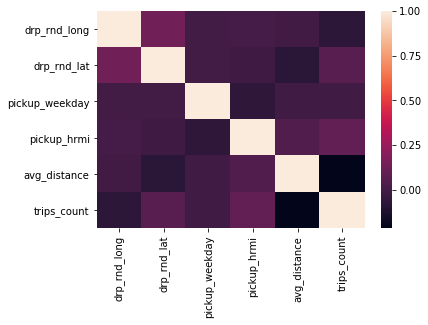

In [3]:
sns.heatmap(dfp.corr())

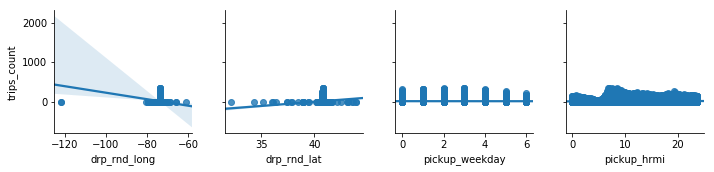

In [4]:
sns.pairplot(dfp, x_vars=['drp_rnd_long','drp_rnd_lat','pickup_weekday','pickup_hrmi'], y_vars='trips_count', kind='reg')

#### Create dummies for weekday column as it is categorical

In [5]:
dfdum = pd.get_dummies(dfp.pickup_weekday, prefix='week').drop('week_0', axis=1)
dfp = pd.concat([dfp,dfdum], axis=1)

In [6]:
dfp.head()

,drp_rnd_long,drp_rnd_lat,pickup_weekday,pickup_hrmi,avg_distance,trips_count,week_1,week_2,week_3,week_4,week_5,week_6
0,-121.93,37.39,2,18.25,0.021824,1,0,1,0,0,0,0
1,-121.93,37.39,4,13.75,0.014827,1,0,0,0,1,0,0
2,-80.36,42.09,3,18.25,85.979240,1,0,0,1,0,0,0
3,-79.82,38.96,3,13.50,546.453239,1,0,0,1,0,0,0
4,-79.79,40.92,6,21.00,104.875073,1,0,0,0,0,0,1


In [7]:
X = dfp[['drp_rnd_long','drp_rnd_lat','pickup_hrmi','week_1','week_2','week_3','week_4','week_5', 'week_6']]
y = dfp['trips_count']

In [8]:
lr = LinearRegression()
lr_scores = cross_val_score(lr, X, y, cv=10)

In [9]:
print (lr_scores)

[-9.46209509e+00 -2.40635358e-01 -2.33726492e-01  6.42046971e-03
  3.85228361e-02  1.56747483e-02 -2.43782960e+01 -5.64377175e+01
 -4.32738280e+00 -2.78054007e+01]


#### Do a single train test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

26.829107457476027


#### Compare with a null RMSE

y_pred

In [12]:
y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_test.mean())
y_null

array([12.58111935, 12.58111935, 12.58111935, ..., 12.58111935,
       12.58111935, 12.58111935])

In [13]:
np.sqrt(metrics.mean_squared_error(y_test, y_null))

27.162845138090184

The RMSE for the liner regression model is only slightly better than NULL rmse.

#### Test it with other models

In [14]:
def fit_and_predict(rgr, name):
    rgr.fit(X_train,y_train)
    y_pred = rgr.predict(X_test)
    print (name, ':', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ("Null:", np.sqrt(metrics.mean_squared_error(y_test, y_null)))
    

In [15]:
fit_and_predict(LinearRegression(), 'Linear Regression')

Linear Regression : 26.829107457476027
Null: 27.162845138090184


In [16]:
from sklearn.svm import SVR
fit_and_predict(SVR(), 'Support Vector Regression')

Support Vector Regression : 28.769528109433622
Null: 27.162845138090184


#### The SVR peformance badly. But as it is recommended to scale the data for SVR, we first use scaler

In [54]:
def split_fit_and_predict(X, y, rgr, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    rgr.fit(X_train,y_train)
    y_pred = rgr.predict(X_test)
    print (name, ':', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    y_null = np.zeros_like(y_test, dtype=float)
    y_null.fill(y_test.values.mean())
    print ("Null:", np.sqrt(metrics.mean_squared_error(y_test, y_null)))

In [55]:
X.head()

,drp_rnd_long,drp_rnd_lat,pickup_hrmi,week_1,week_2,week_3,week_4,week_5,week_6
0,-121.93,37.39,18.25,0,1,0,0,0,0
1,-121.93,37.39,13.75,0,0,0,1,0,0
2,-80.36,42.09,18.25,0,0,1,0,0,0
3,-79.82,38.96,13.50,0,0,1,0,0,0
4,-79.79,40.92,21.00,0,0,0,0,0,1


In [56]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [57]:
Xs

array([[-2.13427727e+02, -3.97960428e+01,  7.82477039e-01, ...,
        -4.15832474e-01, -4.22863812e-01, -4.25961713e-01],
       [-2.13427727e+02, -3.97960428e+01,  1.73470519e-01, ...,
         2.40481459e+00, -4.22863812e-01, -4.25961713e-01],
       [-2.85543555e+01,  1.60438106e+01,  7.82477039e-01, ...,
        -4.15832474e-01, -4.22863812e-01, -4.25961713e-01],
       ...,
       [ 3.57532931e+01, -1.52027456e+01,  5.79474866e-01, ...,
        -4.15832474e-01, -4.22863812e-01,  2.34762883e+00],
       [ 3.59756570e+01, -7.57949269e+01,  1.05314660e+00, ...,
        -4.15832474e-01, -4.22863812e-01, -4.25961713e-01],
       [ 5.60328836e+01, -3.43308656e+01,  5.79474866e-01, ...,
         2.40481459e+00, -4.22863812e-01, -4.25961713e-01]])

In [58]:
split_fit_and_predict(X, y, LinearRegression(), 'Linear Regression')

Linear Regression : 26.829107457476027
Null: 27.162845138090184


In [59]:
split_fit_and_predict(Xs, y, LinearRegression(), 'Linear Regression')

Linear Regression : 26.82910745747603
Null: 27.162845138090184


In [60]:
split_fit_and_predict(Xs, y, SVR(), 'Support Vector Regression with scale')

Support Vector Regression with scale : 27.603133033032044
Null: 27.162845138090184


#### Scaling has reduced RMSE for SVR but still it is not better then NULL RMSE

#### We try now to fit a model for a given location

In [61]:
#-73.98, 40.76 is chosen as the x,y
fdf = dfp[(dfp['drp_rnd_long']==-73.98) & (dfp['drp_rnd_lat']==40.76)]

In [62]:
fdf.head()

,drp_rnd_long,drp_rnd_lat,pickup_weekday,pickup_hrmi,avg_distance,trips_count,week_1,week_2,week_3,week_4,week_5,week_6
32138,-73.98,40.76,0,0.00,4.023653,45,0,0,0,0,0,0
32139,-73.98,40.76,0,0.25,3.043980,36,0,0,0,0,0,0
32140,-73.98,40.76,0,0.50,3.030903,29,0,0,0,0,0,0
32141,-73.98,40.76,0,0.75,4.548365,32,0,0,0,0,0,0
32142,-73.98,40.76,0,1.00,5.590141,19,0,0,0,0,0,0


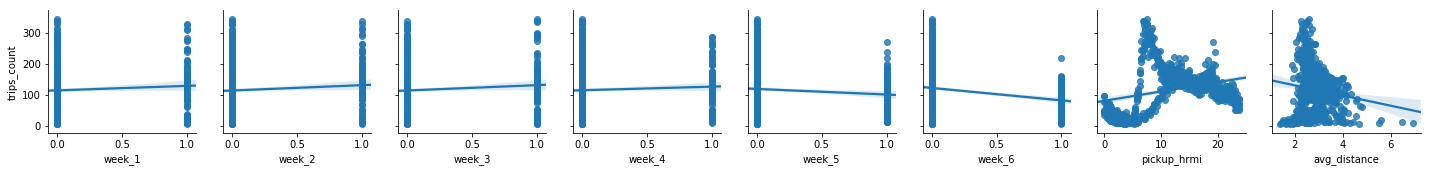

In [63]:
sns.pairplot(fdf, x_vars=['week_1','week_2','week_3','week_4', 'week_5', 'week_6','pickup_hrmi','avg_distance'], y_vars='trips_count', kind='reg')

In [65]:
feature_cols = ['week_1','week_2','week_3','week_4', 'week_5', 'week_6','pickup_hrmi','avg_distance']
target_col = ['trips_count']
Xf = fdf[feature_cols]
yf = fdf[target_col]
split_fit_and_predict(Xf, yf, LinearRegression(), 'Linear regression for a location')

Linear regression for a location : 61.253122455773536
Null: 67.52595216855399
